## Conventions
* スペルミス
* 文頭は大文字(コロン，疑問符)
* 文字数も関係してる気がする(スペルミスなどが多いのに点数が高かったり，少ないのに点数が低かったりするため)
* 引用の後は大文字になっているか
* 曜日，月，祝日は大文字
* 小文字，句読点の間違い
* 固有表現抽出(https://qiita.com/m__k/items/ffd3b7774f2fde1083fa#%E5%9B%BA%E6%9C%89%E8%A1%A8%E7%8F%BE%E6%8A%BD%E5%87%BAnamed-entities)

In [ ]:
!pip3 install wordninja

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random

## スペルミス
* https://qiita.com/seigot/items/3b29b4d03297c4275bb1

### pyspellchecker
* 句読点を全て削除してからが良さそう

In [4]:
%%capture
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 50.0 MB/s eta 0:00:00a 0:00:01


In [2]:
from spellchecker import SpellChecker

spell = SpellChecker()

In [3]:
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

happening
{'penning', 'henning', 'happening'}


In [4]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')
text = df['full_text']

In [9]:
# 正しいのにカウントされているもの
# you're
# tv
# 'がついているもの
# `がついている
# 1文字のもの
# シングルクオートがついている省略表現を列挙

#### ミススペルをカウントする関数

In [11]:
def misspell_count(text):
    # 改行の削除
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    # 句読点を抜く
    text = text.replace('.', ' ')
    text = text.replace(',', ' ')
    text = text.replace('!', ' ')
    text = text.replace('?', ' ')
    # ダブルクォーテーションで囲まれているものの中身だけ取り出す
    #text = text.strip('"')
    text = text.replace('"', ' ')
    # シングルクオートをそのまま削除するのは上手くいかない
    #text = text.replace("''", ' ')   
    text = text.replace(':', ' ')
    text = text.replace(';', ' ')
    text = text.replace('/', ' ')
    text = text.replace('-', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = text.replace('_', ' ')
    #text = text.replace('\', ' ')
    
    # 固有名詞も除きたいかも
    
    text_words = text.split()
    misspelled = spell.unknown(text_words)
    count = 0
    for word in misspelled:
        # 一文字をミススペルに入れた方が相関係数が高い
        #if len(word) == 1:
         #   count = count
        # 数字が含まれる時はカウントしない
        # 数字が含まれているものも未知語としてカウントされるため
        if any(chr.isdigit() for chr in word):
            count = count
        else:
            count += 1
            # スペルミス
            #print(word)
        # 最も可能性の高い単語
        #print(spell.correction(word))
    #print(count)
    return count 

In [12]:
# ミススペルのカウント
miss_count = []

for i in range(3911):
    check_text = text[i]
    m_count = misspell_count(check_text)
    miss_count.append(m_count)

In [ ]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://security.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]m
Get:4 http://security.debian.org/debian-security buster/updates/main arm64 Packages [383 kB]
Get:5 http://deb.debian.org/debian buster/main arm64 Packages [7737 kB]
Get:6 http://deb.debian.org/debian buster-updates/main arm64 Packages [8780 B]
Fetched 8343 kB in 1s (7298 kB/s)3m
Reading package lists... Done
Building dependency tree       
Reading state information... Done
115 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.7-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist 

In [ ]:
#%%capture
!pip install pyenchant

In [ ]:
import enchant
d = enchant.Dict("en_US")
d.check("Hello")

In [ ]:
d.check("Helo")

## 文頭の大文字

In [23]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')
text = df['full_text']

In [25]:
def BOS_check(text):
    count = 0
    # 改行を無くす
    full_text = text.replace('\n', '')
    full_text = full_text.replace('\r', '')
    # コロン，?,!で区切る
    texts = re.split('[.?!]', full_text)
    for i in range(len(texts)):
        # 文を単語ごとに分割
        text = texts[i].split()
        # 文が空じゃないなら
        if text != []:
            # 一単語目の一文字目が大文字ならTrue(一文字目の前に空白があっても良い)
            if text[0].istitle():
                count = count
            else:
                count += 1
    return count

In [26]:
# 大文字から始まらない文章をカウントする
bos_count = []

for i in range(3911):
    check_text = text[i]
    bos = BOS_check(check_text)
    bos_count.append(bos)

## 文字数，単語数のカウント

In [35]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')
text = df['full_text']

In [36]:
a = text[16].replace('\n', ' ')
a = a.replace('\r', ' ')
words_count = len(a.split())
words_count

399

In [37]:
def word_count(text):
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('.', ' ')
    text = text.replace(',', ' ')
    text = text.replace('!', ' ')
    text = text.replace('?', ' ')
    # ダブルクォーテーションで囲まれているものの中身だけ取り出す
    #text = text.strip('"')
    text = text.replace('"', ' ')
    # シングルクオートをそのまま削除するのは上手くいかない
    #text = text.replace("''", ' ')   
    text = text.replace(':', ' ')
    text = text.replace(';', ' ')
    text = text.replace('/', ' ')
    text = text.replace('-', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = text.replace('_', ' ')
    num_word = len(text.split())
    return num_word

In [38]:
# 単語数のカウント
num_words = []

for i in range(3911):
    check_text = text[i]
    count = word_count(check_text)
    num_words.append(count)

## 曜日，月が大文字になっているのかの確認

In [75]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')
text = df['full_text']

In [137]:
week_list = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
# Mayは判定できないので除外
months_list = ['january', 'february', 'march', 'april', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

week_months_counts = []

a = len(text)
for i in range(a):
    count = 0
    for j in week_list:
        # jには曜日が入る
        week_count = text[i].count(j)
        count = count + week_count
    for k in months_list:
        # kには月が入る
        months_count = text[i].count(k)
        count = count + months_count
    #if count != 0:
    #    print(i)
    #    print(count)
    week_months_counts.append(count)

In [134]:
len(week_months_counts)

3911

## 固有名詞抽出

In [167]:
!pip install nltk

In [ ]:
import nltk
nltk.download('all')

In [168]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')
text = df['full_text']

In [183]:
s = text[10]
morph = nltk.word_tokenize(s)
pos = nltk.pos_tag(morph)
# chunk.ne_chunkに品詞情報を渡す
#entities = nltk.chunk.ne_chunk(pos)
print(pos)

[('Do', 'VBP'), ('you', 'PRP'), ('think', 'VB'), ('its', 'PRP$'), ('a', 'DT'), ('good', 'JJ'), ('idea', 'NN'), ('for', 'IN'), ('students', 'NNS'), ('to', 'TO'), ('commit', 'VB'), ('to', 'TO'), ('a', 'DT'), ('career', 'NN'), ('at', 'IN'), ('a', 'DT'), ('young', 'JJ'), ('age', 'NN'), ('?', '.'), ('In', 'IN'), ('some', 'DT'), ('societies', 'NNS'), (',', ','), ('students', 'NNS'), ('are', 'VBP'), ('expected', 'VBN'), ('to', 'TO'), ('identity', 'VB'), ('a', 'DT'), ('career', 'NN'), ('by', 'IN'), ('the', 'DT'), ('time', 'NN'), ('they', 'PRP'), ('enter', 'VBP'), ('high', 'JJ'), ('school', 'NN'), ('.', '.'), ('Yes', 'VB'), ('it', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('good', 'JJ'), ('idea', 'NN'), ('to', 'TO'), ('start', 'VB'), ('young', 'JJ'), ('because', 'IN'), ('your', 'PRP$'), ('already', 'RB'), ('step', 'NN'), ('ahead', 'RB'), (',', ','), ('you', 'PRP'), ('will', 'MD'), ('have', 'VB'), ('background', 'VBN'), ('knowledge', 'NN'), ('about', 'IN'), ('the', 'DT'), ('career', 'NN'), ('classes',

In [186]:
s = "Hi, I'm Taro Yamada I woke up at 8am"
morph = nltk.word_tokenize(s)
pos = nltk.pos_tag(morph)
len(pos)

11

In [184]:
len(pos)

338

In [ ]:

for i in range(len(text)):
    morph = nltk.word_tokenize(text[i])
    pos = nltk.pos_tag(morph)
    for j in range(len(pos)):
        if pos[j][1] == 'NNP':
            print(pos[j][0])
#nnp = 'NNP'

#for i in range(a):
#    count = 0
#    for j in week_list:

## まとめ

In [192]:
df = pd.read_csv('/workspace/kaggle_data/train.csv')

# 文章の単語数
df['word_count'] = num_words

# スペルミスのカウント
df['miss_count'] = miss_count

# 文頭が大文字になっていない数
df['bos_count'] = bos_count
# 曜日や月の一文字目が大文字になっているか
df['week_months'] = week_months_counts
df['small_count'] = df['bos_count'] + df['week_months']

# 単語数に対する割合の計算
df['miss_rate'] = df['miss_count']/df['word_count']
df['small_rate'] = df['small_count']/df['word_count']

# 対数変換
df['log_miss_rate'] = np.log(df['miss_rate'] + 1)
df['log_small_rate'] = np.log(df['small_rate'] + 1)

# 神の数字(0.5067)
df['sample'] = 1.5 * df['log_miss_rate'] + df['log_small_rate']
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count,miss_count,bos_count,week_months,small_count,miss_rate,small_rate,log_miss_rate,log_small_rate,sample
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,262,0,15,0,15,0.000000,0.057252,0.000000,0.055673,0.055673
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,533,1,4,0,4,0.001876,0.007505,0.001874,0.007477,0.010288
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,320,4,2,0,2,0.012500,0.006250,0.012423,0.006231,0.024864
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,727,1,2,0,2,0.001376,0.002751,0.001375,0.002747,0.004809
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,234,7,0,0,0,0.029915,0.000000,0.029476,0.000000,0.044214


In [193]:
pwd

'/workspace/kaggle-Feedback-English-Language-Learning/ipynb'

In [194]:
df.to_csv('/workspace/kaggle_data/conventions_eda_data.csv',index=False)

In [165]:
def correlation_check(a):
    a = df[a].to_numpy()
    col_list = ['cohesion', 'syntax', 'vocabulary','phraseology', 'grammar', 'conventions']
    for i in col_list:
        col = df[i].to_numpy()
        print(np.corrcoef(a, col))
    return 

In [166]:
correlation_check('sample')

[[ 1.         -0.34564302]
 [-0.34564302  1.        ]]
[[ 1.        -0.3499449]
 [-0.3499449  1.       ]]
[[ 1.         -0.35929639]
 [-0.35929639  1.        ]]
[[ 1.         -0.34317281]
 [-0.34317281  1.        ]]
[[ 1.         -0.30753152]
 [-0.30753152  1.        ]]
[[ 1.        -0.5067407]
 [-0.5067407  1.       ]]


In [45]:
text = df['full_text']

(array([1.576e+03, 8.660e+02, 4.010e+02, 1.560e+02, 2.540e+02, 1.850e+02,
        1.330e+02, 5.200e+01, 8.100e+01, 5.700e+01, 2.500e+01, 2.900e+01,
        2.400e+01, 1.900e+01, 8.000e+00, 1.400e+01, 4.000e+00, 3.000e+00,
        5.000e+00, 2.000e+00, 6.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.  ,  1.72,  3.44,  5.16,  6.88,  8.6 , 10.32, 12.04, 13.76,
        15.48, 17.2 , 18.92, 20.64, 22.36, 24.08, 25.8 , 27.52, 29.24,
        30.96, 32.68, 34.4 , 36.12, 37.84, 39.56, 41.28, 43.  , 44.72,
        46.44, 48.16, 49.88, 51.6 , 53.32, 55.04, 56.76, 58.48, 60.2 ,
        61.92, 63.64, 65.36, 67.08, 68.8 , 70.52, 72.24, 73.96, 75.68,
        77.4 , 79.12,

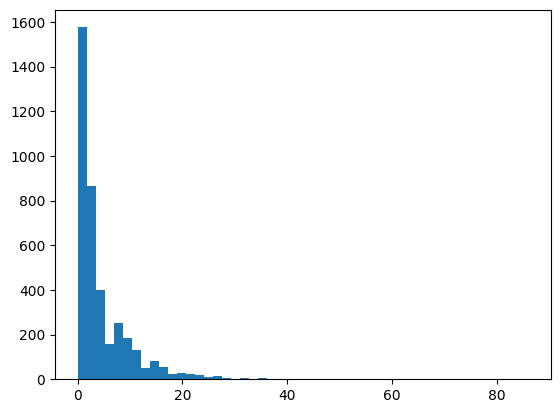

In [51]:
x = df['miss_count']
plt.hist(x, bins=50)

## LightGBMでの予測

In [364]:
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,miss_count,bos_count,word_count,miss_rate,bos_rate
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,0,15,262,0.000000,0.057252
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,1,4,533,0.001876,0.007505
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,4,2,320,0.012500,0.006250
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,1,2,727,0.001376,0.002751
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,7,0,234,0.029915,0.000000


In [371]:
import lightgbm as lgbm

from sklearn.model_selection import train_test_split

In [372]:
x = df[['miss_count','bos_count','word_count','miss_rate','bos_rate']]
y = df['conventions']

In [375]:
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size = 0.3, random_state=3655)

In [379]:

categorical_features = []

#LightGBM用の訓練データセットを作成
lgb_train = lgb.Dataset(x_train,y_train,categorical_feature=categorical_features,free_raw_data=False)

#LightGBM用の評価データセットを作成
lgb_eval = lgb.Dataset(x_valid,y_valid,reference=lgb_train,categorical_feature=categorical_features,free_raw_data=False)


#ハイパーパラメータを設定
params = {
    'boosting_type': 'gbdt',

    #'objective': 'binary', 二値分類
    'objective': 'regression', #回帰
    
    'metric':'rmse',
    #'metric': {'l2', 'l1'}, 

    'num_leaves': 10,
    'learning_rate': 0.05,
    #'feature_fraction': 0.9,
    #'bagging_fraction': 0.8,
    #'bagging_freq': 5,
    #'vervose': 0
    
}

#LightGBMの学習
lgbm_model = lgbm.train(params,lgb_train,
                 valid_sets=[lgb_train,lgb_eval],
                 verbose_eval=10,
                 num_boost_round=100,
                 early_stopping_rounds= 20)

#最もスコアの良いモデルの保存
optimum_boost_rounds = lgbm_model.best_iteration

#LightGBMの予測
y_pred = lgbm_model.predict(x_valid,num_interation=lgbm_model.best_iteration)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 2737, number of used features: 5
[LightGBM] [Info] Start training from score 3.071246
Training until validation scores don't improve for 20 rounds
[10]	training's rmse: 0.60747	valid_1's rmse: 0.605989
[20]	training's rmse: 0.57837	valid_1's rmse: 0.584795
[30]	training's rmse: 0.564741	valid_1's rmse: 0.577608
[40]	training's rmse: 0.557666	valid_1's rmse: 0.575333
[50]	training's rmse: 0.553032	valid_1's rmse: 0.575127
[60]	training's rmse: 0.549615	valid_1's rmse: 0.575744
Early stopping, best iteration is:
[46]	training's rmse: 0.554705	valid_1's rmse: 0.574914
[LightGBM] [Warning] Unknown parameter: num_interation


## 線形回帰

In [380]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [383]:
y_pred = lr.predict(x_valid) 
mean_squared_error(y_valid, y_pred,squared=False) # RMSE

0.5832381459822951